In [43]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import shapely
from shapely import plotting

In [2]:
# Load datasets
pois = pd.read_csv('data\POIs\POI_4815075.csv')
names = gpd.read_file('data\STREETS_NAMING_ADDRESSING\SREETS_NAMING_ADDRESSING_4815075.geojson')
nav = gpd.read_file('data\STREETS_NAV\SREETS_NAV_4815075.geojson')

In [3]:
# Combine Linestring geometry datasets
combined_map = pd.merge(nav, names, how='inner', on='link_id')

In [5]:
combined_map.drop(columns=['geometry_x'], inplace=True)
combined_map.rename(columns={'geometry_y': 'geometry'}, inplace=True)

In [6]:
# Sort DataFrame by street name
combined_map.sort_values(by='ST_NAME', inplace=True)
# Reset index
combined_map.reset_index(drop=True, inplace=True)

In [7]:
map_data = pd.DataFrame(names['ST_NAME'].value_counts())
map_data['ST_NAME'] = map_data.index

In [93]:
relevant_streets = map_data[:300][:]
point_map = gpd.GeoDataFrame()
# Point map
for i in relevant_streets['ST_NAME']:
    example = names.loc[names["ST_NAME"] == i]
    lst = [point_map, example.geometry.boundary.extract_unique_points()]
    point_map = gpd.GeoDataFrame( pd.concat( lst, ignore_index=True) )


<Axes: >

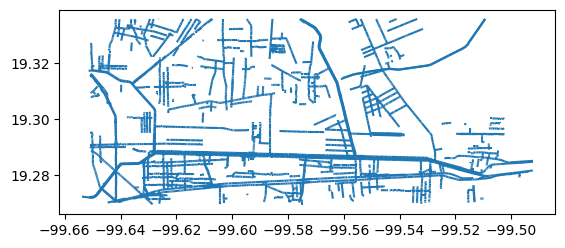

In [12]:
point_map.plot()

In [94]:
point_map = point_map.rename(columns={point_map.columns[0]: 'geometry'})
point_map.set_geometry('geometry', inplace=True)

<Axes: >

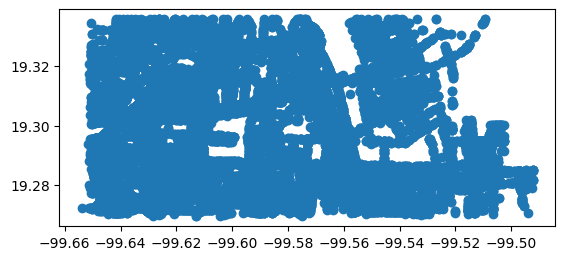

In [95]:
point_map.plot()

In [96]:
point_map.extract_unique_points()

0        MULTIPOINT ((-99.64464 19.27013), (-99.64272 1...
1        MULTIPOINT ((-99.64281 19.27029), (-99.6423 19...
2        MULTIPOINT ((-99.6407 19.27029), (-99.64023 19...
3        MULTIPOINT ((-99.64118 19.27038), (-99.64108 1...
4        MULTIPOINT ((-99.6423 19.2704), (-99.6418 19.2...
                               ...                        
12977    MULTIPOINT ((-99.55263 19.2819), (-99.55267 19...
12978    MULTIPOINT ((-99.55267 19.28251), (-99.55268 1...
12979    MULTIPOINT ((-99.55268 19.28263), (-99.55272 1...
12980    MULTIPOINT ((-99.55272 19.28289), (-99.55272 1...
12981    MULTIPOINT ((-99.55272 19.28295), (-99.55286 1...
Length: 12982, dtype: geometry

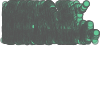

In [97]:
point_map.union_all()

In [98]:
point_map

,geometry
0,"MULTIPOINT ((-99.64464 19.27013), (-99.64272 1..."
1,"MULTIPOINT ((-99.64281 19.27029), (-99.6423 19..."
2,"MULTIPOINT ((-99.6407 19.27029), (-99.64023 19..."
3,"MULTIPOINT ((-99.64118 19.27038), (-99.64108 1..."
4,"MULTIPOINT ((-99.6423 19.2704), (-99.6418 19.2..."
...,...
12977,"MULTIPOINT ((-99.55263 19.2819), (-99.55267 19..."
12978,"MULTIPOINT ((-99.55267 19.28251), (-99.55268 1..."
12979,"MULTIPOINT ((-99.55268 19.28263), (-99.55272 1..."
12980,"MULTIPOINT ((-99.55272 19.28289), (-99.55272 1..."


<Axes: >

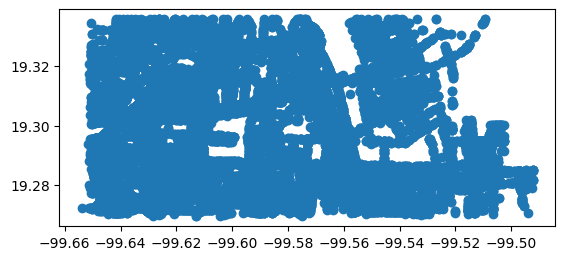

In [100]:
# Explode the MultiPoint geometries into individual Points
point_map_exploded = point_map.explode(index_parts=False).reset_index(drop=True)
point_map_exploded.plot()